### Import Helper Libraries 

In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split

In [32]:
warnings.filterwarnings('ignore')

In [33]:
sns.set_theme(context = 'paper' , style = 'whitegrid' , palette = 'Set1' , 
             rc = {'figure.figsize' : (8 , 4)})

In [34]:
%matplotlib inline 

### Read Dataset 

In [35]:
df = pd.read_csv('student_scores - student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Check data info for missing records and data types 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### No missing records 

In [37]:
df.isnull().mean()*100

Hours     0.0
Scores    0.0
dtype: float64

### No duplicated records 

In [38]:
df.duplicated().sum()

0

### Show Distribution of Hours feature 

<AxesSubplot:xlabel='Hours', ylabel='Density'>

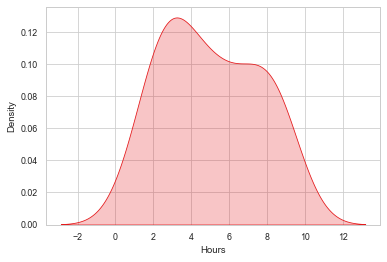

In [39]:
sns.kdeplot(data = df , x = df['Hours'] , shade = True)

### Correlation between feature and target (strong +ve linear corr)

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

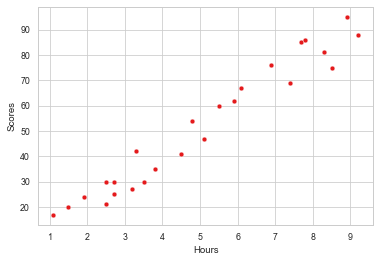

In [40]:
sns.scatterplot(data = df , y = df['Scores'] , x = df['Hours'])

<AxesSubplot:>

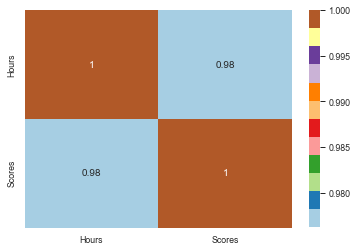

In [41]:
sns.heatmap(df.corr() , annot = True , cmap = 'Paired')

In [42]:
df.shape

(25, 2)

### Split data into train & tests set 

In [43]:
x = df['Hours']
y = df['Scores']

In [44]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , 
                                                      shuffle = True , random_state = 0)

In [45]:
model = LinearRegression()

### Train model to fit data 

In [46]:
model.fit(np.expand_dims(x_train , 1) , y_train)

LinearRegression()

In [47]:
y_train_prd = model.predict(np.expand_dims(x_train , 1))

### Show training error 

In [48]:
mean_squared_error(y_true = y_train , y_pred = y_train_prd , squared = False)

5.558613350226342

### model score 

In [49]:
r2_score(y_true = y_train , y_pred = y_train_prd)

0.9515510725211552

In [50]:
y_test_prd = model.predict(np.expand_dims(x_test , 1))

### show test error 

In [51]:
mean_squared_error(y_true = y_test , y_pred = y_test_prd , squared = False)

4.647447612100367

### tests score 

In [52]:
r2_score(y_true = y_test , y_pred = y_test_prd)

0.9454906892105355

### Best line to fit our data 

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

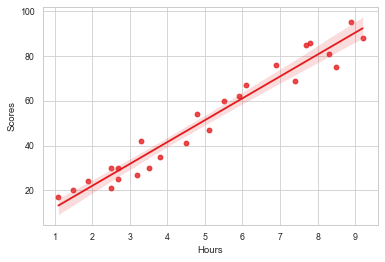

In [53]:
sns.regplot(x , y )

In [54]:
9.25 * model.coef_ + model.intercept_

array([93.69173249])